# Online Retail

## Table of Contents
1. **[Project Description](#1)**
2. **[Data Pre-Processing](#2)**
3. **[Exploratory Data Analysis (EDA)](#3)**

## 1. Project Description <a class="anchor" id="1"></a>

**Motivation:** 

**Goal of the project:** <br>

**Data Source:** Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK. <br>
- The dataset can be downloaded from here (https://archive.ics.uci.edu/ml/datasets/online+retail)

**Data Set Information:**

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Online Retail Transactions data:**<br>
- **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. <br>
- **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.<br>
- **Description**: Product (item) name. Nominal.<br>
- **Quantity**: The quantities of each product (item) per transaction. Numeric.<br>
- **InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.<br>
- **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.<br>
- **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.<br>
- **Country**: Country name. Nominal, the name of the country where each customer resides.<br>


In [1]:
### Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# plt.style.use('ggplot')
COLORS = sns.color_palette()

## 1.1 Dataset Exploration

In [2]:
df = pd.read_csv('./OnlineRetail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


CustomerID can't be empty, because it acts as a primary and foreign key. So delete this feature

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Negative quantitiy and UnitPrice don't seem reasonable in this business context, so the negative values will be removed

In [6]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 541909
Number of columns: 8


## 2. Data Pre-Processing <a class="anchor" id="2"></a>

### 2.1 Handling Null values

In [7]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [8]:
# Delete null values in CustomerID
df = df[pd.notnull(df['CustomerID'])]
len(df)

406829

### 2.2 Handling values that don't follow the business logic
- Business Logic: Quantity & UnitPrice should be higer than 0

In [9]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
len(df)

397884

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


We can see that there are no null values in the dataset

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


After data cleaning, we can observe that Quantity and UnitPrice don't have any negative values

### 2.3 Change Data type

In [12]:
# Convert CustomerID's data type
df['CustomerID'] = df['CustomerID'].astype(np.int32)

### 2.4 Add CheckoutPrice column (Quantity * UnitPrice)

In [13]:
df['CheckoutPrice'] = df['Quantity'] * df['UnitPrice']

### 2.5 Change Datetime

In [36]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], infer_datetime_format=True) # Automatically adjust to datetime format

## 3. Exploratory Data Analysis (EDA) <a class="anchor" id="3"></a>

### **Goal of Data Analysis**
1. Sales Revenue analysis
2. Customer analysis -> Find our loyal customer & Customer retention rate
3. Push Notification & Decision Making

### 3.1.1 Total Sales Revenue

In [15]:
total_revenue = df['CheckoutPrice'].sum()
total_revenue

8911407.904

### 3.1.2 Total Sales Revenue by Country

In [16]:
rev_by_countries = df.groupby('Country').sum()['CheckoutPrice'].sort_values(ascending=False)

In [17]:
rev_by_countries / total_revenue

Country
United Kingdom          0.820116
Netherlands             0.032032
EIRE                    0.029798
Germany                 0.025682
France                  0.023456
Australia               0.015544
Spain                   0.006910
Switzerland             0.006334
Belgium                 0.004623
Sweden                  0.004307
Japan                   0.004199
Norway                  0.004058
Portugal                0.003752
Finland                 0.002530
Singapore               0.002388
Channel Islands         0.002295
Denmark                 0.002127
Italy                   0.001962
Cyprus                  0.001525
Austria                 0.001144
Poland                  0.000823
Israel                  0.000810
Greece                  0.000534
Iceland                 0.000484
Canada                  0.000411
USA                     0.000402
Malta                   0.000306
Unspecified             0.000299
United Arab Emirates    0.000213
Lebanon                 0.000190
Li

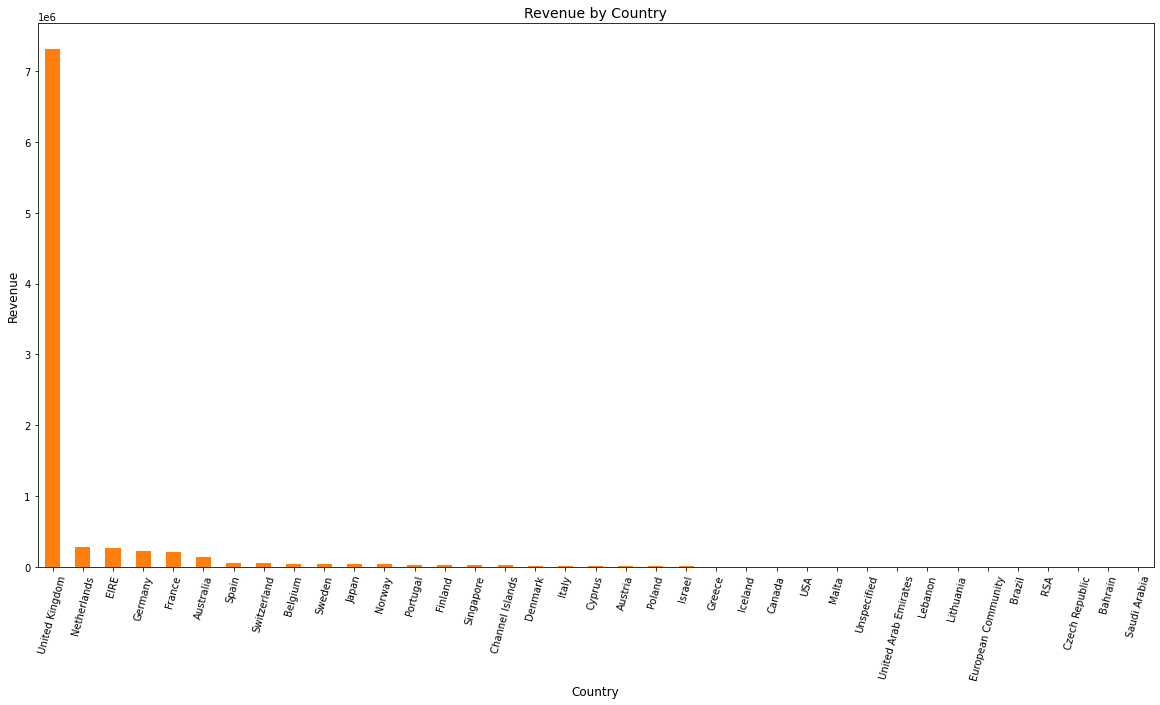

In [18]:
# Graph util function
def plot_bar(data, xlabel, ylabel, title, color=COLORS[1], figsize=(20,10), rotation=75):
    plot = data.plot(kind='bar', color=color, figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=12)
    plot.set_ylabel(ylabel, fontsize=12)
    plot.set_title(title, fontsize=14)
    plot.set_xticklabels(labels=data.index, rotation=75)

plot_bar(rev_by_countries, 'Country', 'Revenue', 'Revenue by Country')

### 3.1.3 Monthly Sales Revenue

In [19]:
def extract_month(date):
    month = str(date.month)
    if date.month < 10:
        month = '0' + month
    return str(date.year) + month

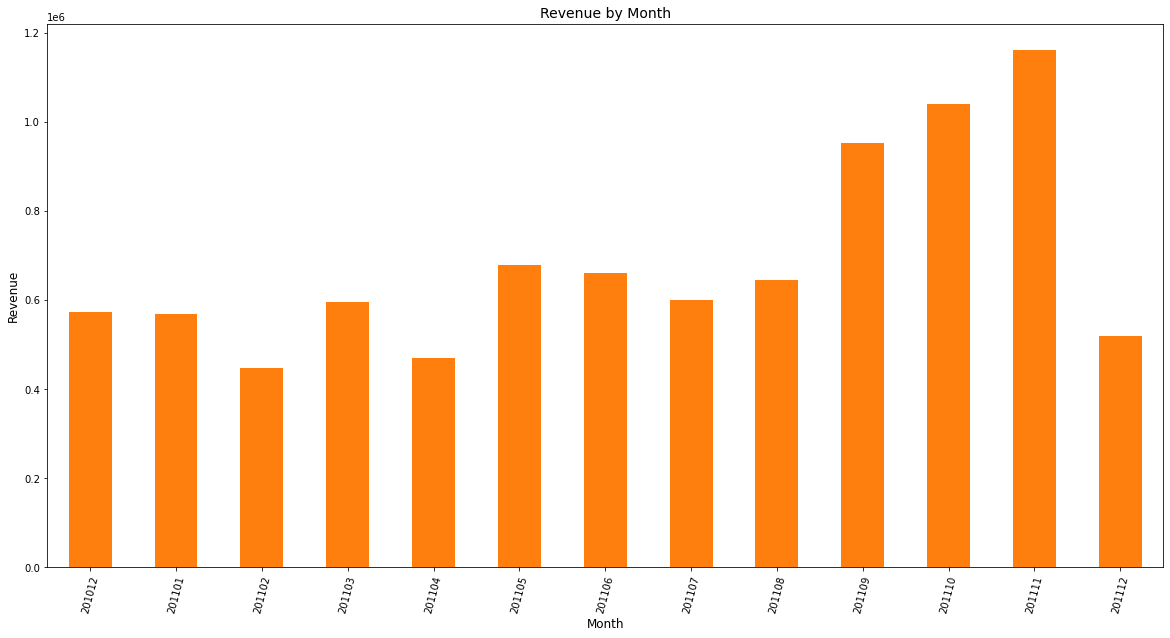

In [20]:
rev_by_month = df.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice']
plot_bar(rev_by_month, 'Month', 'Revenue', 'Revenue by Month')

### 3.1.4 Day of the week Sales Revenue

In [21]:
rev_by_dow = df.set_index('InvoiceDate').groupby(lambda date:date.dayofweek).sum()['CheckoutPrice']
rev_by_dow

0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

- No data for saturday (5)

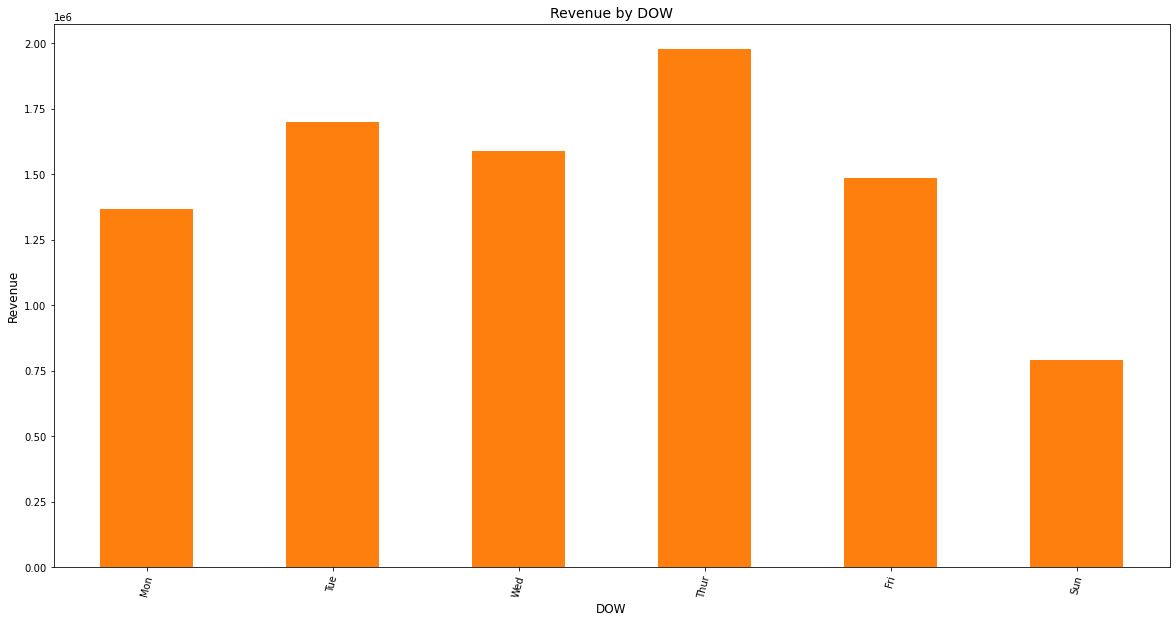

In [22]:
DAY_OF_WEEK = np.array(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]
plot_bar(rev_by_dow, 'DOW', 'Revenue', 'Revenue by DOW')

### 3.1.5 Hourly Sales Revenue

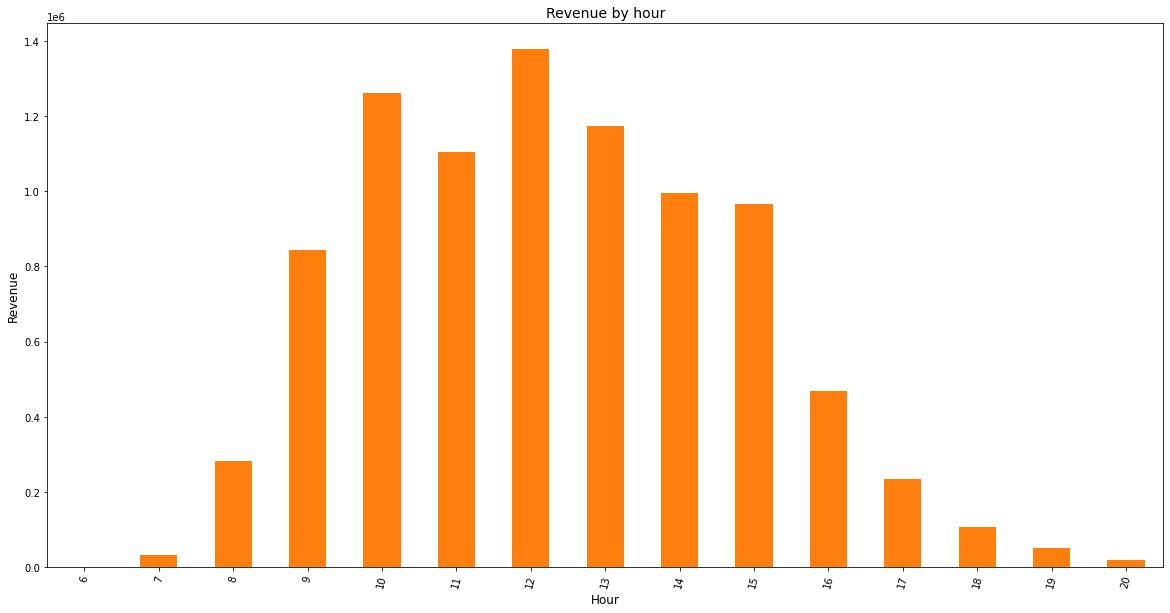

In [23]:
rev_by_hour = df.set_index('InvoiceDate').groupby(lambda date:date.hour).sum()['CheckoutPrice']
plot_bar(rev_by_hour, 'Hour', 'Revenue', 'Revenue by hour')

### Insight from Sales Revenue
- 82% of total sales revenue generated from UK.
- 2011-11 has the highest sales revenue, but all the data from 2011-12 was not fully collected.
    - Hypothesis: Sales revenue from November and Decmeber would be higher than other months due to holiday season (Black Friday, Christmas).
- Based on the day of weeek, an upward trend was visible from Monday to Thursday. But, this trend was converted into the downward trend as of Friday (No sales in Saturday, maybe due to human error or a specific company policy.
- A positive trend was occured from 7AM til 12PM, but there was a steep decrease in revenues after 3pm.

### 3.1.6 Top 10 Selling Products

In [24]:
top_selling = df.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:10]
top_selling

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int64

### 3.1.7 Top 10 Products by Revnue

In [25]:
top_revenue = df.groupby('StockCode').sum()['CheckoutPrice'].sort_values(ascending=False)[:10]
top_revenue

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: CheckoutPrice, dtype: float64

### 3.1.8 Top 3 item's Monthly Sales Revenue

In [26]:
top_selling = df.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:3]
monthly_top3 = df.set_index('InvoiceDate').groupby(['StockCode', extract_month]).sum()[['Quantity', 'CheckoutPrice']].loc[top_selling.index]
monthly_top3

Quantity  CheckoutPrice
StockCode                                
23843     201112     80995      168469.60
23166     201101     74215       77183.60
          201105       792         869.04
          201106       391         458.51
          201107       718         826.94
          201108       405         486.09
          201109       342         397.26
          201110       235         283.67
          201111       631         708.11
          201112       187         203.51
84077     201012      5139        1150.47
          201101      1488         385.44
          201102      3457         795.17
          201103      3888         943.20
          201104     10224        2281.44
          201105      4944        1249.44
          201106      1920         533.76
          201107      3600         982.56
          201108      2256         654.24
          201109      3462         985.70
          201110      8174        1953.98
          201111      4500        1294.20
          201112      1363         376.65

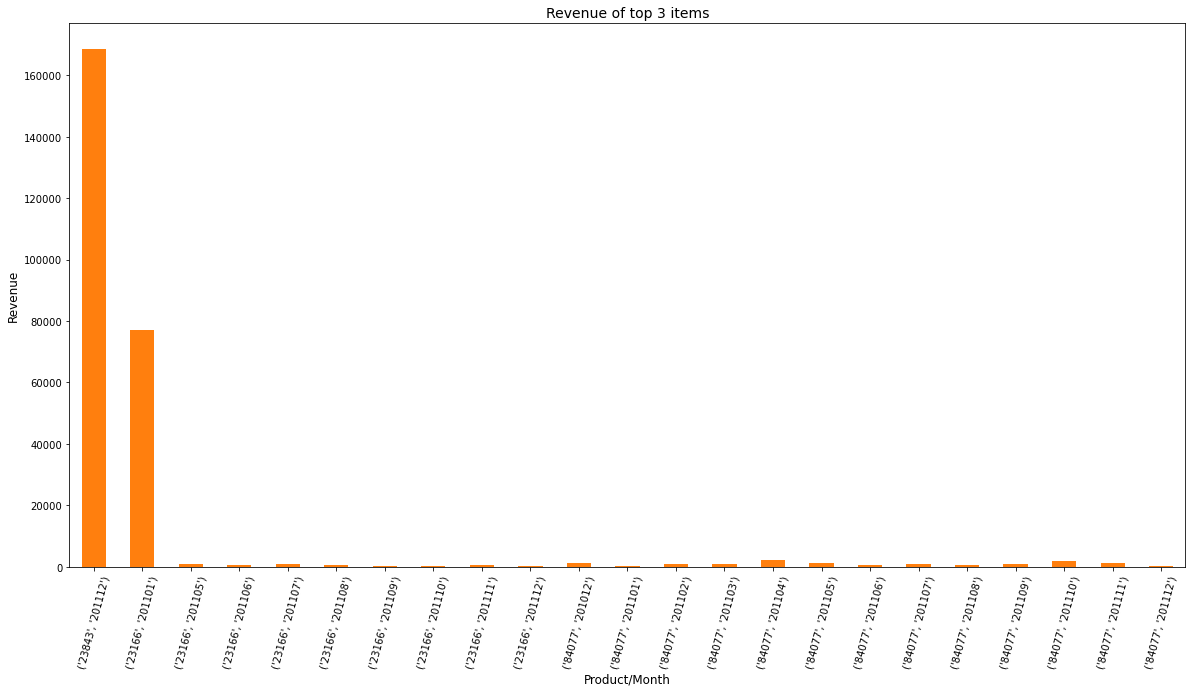

In [27]:
plot_bar(monthly_top3['CheckoutPrice'], 'Product/Month', 'Revenue', 'Revenue of top 3 items')

### 3.2.1 Customer Analysis
- Find our loyal customer
- Customer retention

### 3.2.2 Loyal Customer

In [31]:
# Number of purchases by Customer
df.groupby('CustomerID').count()['Quantity'].sort_values(ascending=False)

CustomerID
17841    7847
14911    5675
14096    5111
12748    4595
14606    2700
         ... 
15823       1
15802       1
15753       1
15668       1
12346       1
Name: Quantity, Length: 4338, dtype: int64

In [32]:
# Purchase amount by customer
df.groupby('CustomerID').sum()['CheckoutPrice'].sort_values(ascending=False)

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
           ...    
16878        13.30
17956        12.75
16454         6.90
14792         6.20
16738         3.75
Name: CheckoutPrice, Length: 4338, dtype: float64

### 3.2.3 Customer retention

In [42]:
from datetime import datetime

def get_month_as_datetime(date):
    return datetime(date.year, date.month, 1)

df['Month'] = df['InvoiceDate'].apply(get_month_as_datetime)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [54]:
# Start Date
month_group = df.groupby('CustomerID')['Month']
df['MonthStarted'] = month_group.transform(np.min)
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01


In [60]:
# End Date
df['MonthPassed'] = (df['Month'].dt.year - df['MonthStarted'].dt.year) * 12 + \
                    (df['Month'].dt.month - df['MonthStarted'].dt.month)
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted,MonthPassed
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,4
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01,4


In [66]:
# Count Number of customers based on MonthStarted & MonthPassed
def get_unique_no(x):
    return len(np.unique(x))


cohort_group = df.groupby(['MonthStarted', 'MonthPassed'])
cohort_df = cohort_group['CustomerID'].apply(get_unique_no).reset_index()
cohort_df.head()

,MonthStarted,MonthPassed,CustomerID
0,2010-12-01,0,885
1,2010-12-01,1,324
2,2010-12-01,2,286
3,2010-12-01,3,340
4,2010-12-01,4,321


In [67]:
cohort_df = cohort_df.pivot(index='MonthStarted', columns='MonthPassed')
cohort_df.head()

CustomerID                                                   \
MonthPassed          0      1      2      3      4      5      6      7    
MonthStarted                                                               
2010-12-01        885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0   
2011-01-01        417.0   92.0  111.0   96.0  134.0  120.0  103.0  101.0   
2011-02-01        380.0   71.0   71.0  108.0  103.0   94.0   96.0  106.0   
2011-03-01        452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0   
2011-04-01        300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   

                                                 
MonthPassed      8      9      10     11     12  
MonthStarted                                     
2010-12-01    313.0  350.0  331.0  445.0  235.0  
2011-01-01    125.0  136.0  152.0   49.0    NaN  
2011-02-01     94.0  116.0   26.0    NaN    NaN  
2011-03-01    126.0   39.0    NaN    NaN    NaN  
2011-04-01     22.0    NaN    NaN    NaN    NaN

In [71]:
# Find percentage based on each column
customer_cohort = cohort_df.div(cohort_df.iloc[:, 0], axis=0) * 100
customer_cohort = customer_cohort.round(decimals=2)

customer_cohort

CustomerID                                                   \
MonthPassed          0      1      2      3      4      5      6      7    
MonthStarted                                                               
2010-12-01        100.0  36.61  32.32  38.42  36.27  39.77  36.27  34.92   
2011-01-01        100.0  22.06  26.62  23.02  32.13  28.78  24.70  24.22   
2011-02-01        100.0  18.68  18.68  28.42  27.11  24.74  25.26  27.89   
2011-03-01        100.0  15.04  25.22  19.91  22.35  16.81  26.77  23.01   
2011-04-01        100.0  21.33  20.33  21.00  19.67  22.67  21.67  26.00   
2011-05-01        100.0  19.01  17.25  17.25  20.77  23.24  26.41   9.51   
2011-06-01        100.0  17.36  15.70  26.45  23.14  33.47   9.50    NaN   
2011-07-01        100.0  18.09  20.74  22.34  27.13  11.17    NaN    NaN   
2011-08-01        100.0  20.71  24.85  24.26  12.43    NaN    NaN    NaN   
2011-09-01        100.0  23.41  30.10  11.37    NaN    NaN    NaN    NaN   
2011-10-01        100.0  24.02  11.45    NaN    NaN    NaN    NaN    NaN   
2011-11-01        100.0  11.15    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01        100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                 
MonthPassed      8      9      10     11     12  
MonthStarted                                     
2010-12-01    35.37  39.55  37.40  50.28  26.55  
2011-01-01    29.98  32.61  36.45  11.75    NaN  
2011-02-01    24.74  30.53   6.84    NaN    NaN  
2011-03-01    27.88   8.63    NaN    NaN    NaN  
2011-04-01     7.33    NaN    NaN    NaN    NaN  
2011-05-01      NaN    NaN    NaN    NaN    NaN  
2011-06-01      NaN    NaN    NaN    NaN    NaN  
2011-07-01      NaN    NaN    NaN    NaN    NaN  
2011-08-01      NaN    NaN    NaN    NaN    NaN  
2011-09-01      NaN    NaN    NaN    NaN    NaN  
2011-10-01      NaN    NaN    NaN    NaN    NaN  
2011-11-01      NaN    NaN    NaN    NaN    NaN  
2011-12-01      NaN    NaN    NaN    NaN    NaN

<AxesSubplot:xlabel='None-MonthPassed', ylabel='MonthStarted'>

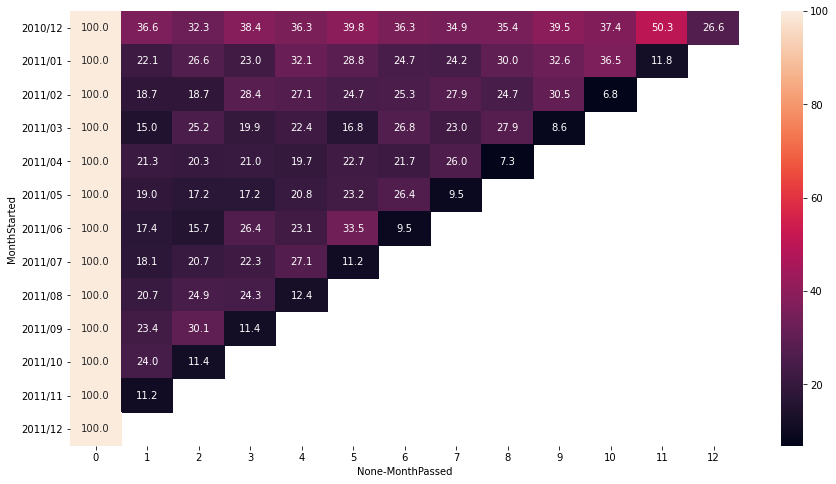

In [75]:
# Customer rention visualization
xticks = np.arange(0, 13)
yticks = ['2010/12','2011/01','2011/02','2011/03','2011/04','2011/05','2011/06','2011/07','2011/08','2011/09','2011/10',
         '2011/11','2011/12']

plt.figure(figsize=(15,8))
sns.heatmap(customer_cohort, annot=True, xticklabels=xticks, yticklabels=yticks, fmt='.1f')

## 4. Decision Making <a class="anchor" id="4"></a>

When we are sending a coupon to our customer, when should we send your push notifcation?

Scenario: We are planning to send a push notifcation to our customer.
- Option 1: What time should we send coupon notifcation?
- Opiton 2: Send it before working or after working hour?
- Option 3: Send it during lunch time?
- Option 4: Many people spend time on their phone before they go to bed, so should we send it at this time?

**Let's find out average time by hourly and half an hour!**

In [77]:
order_by_hour = df.set_index('InvoiceDate').groupby(lambda date: date.hour).count()['CustomerID']
order_by_hour

6         1
7       379
8      8690
9     21944
10    37997
11    49084
12    72065
13    64026
14    54118
15    45369
16    24089
17    13071
18     2928
19     3321
20      802
Name: CustomerID, dtype: int64

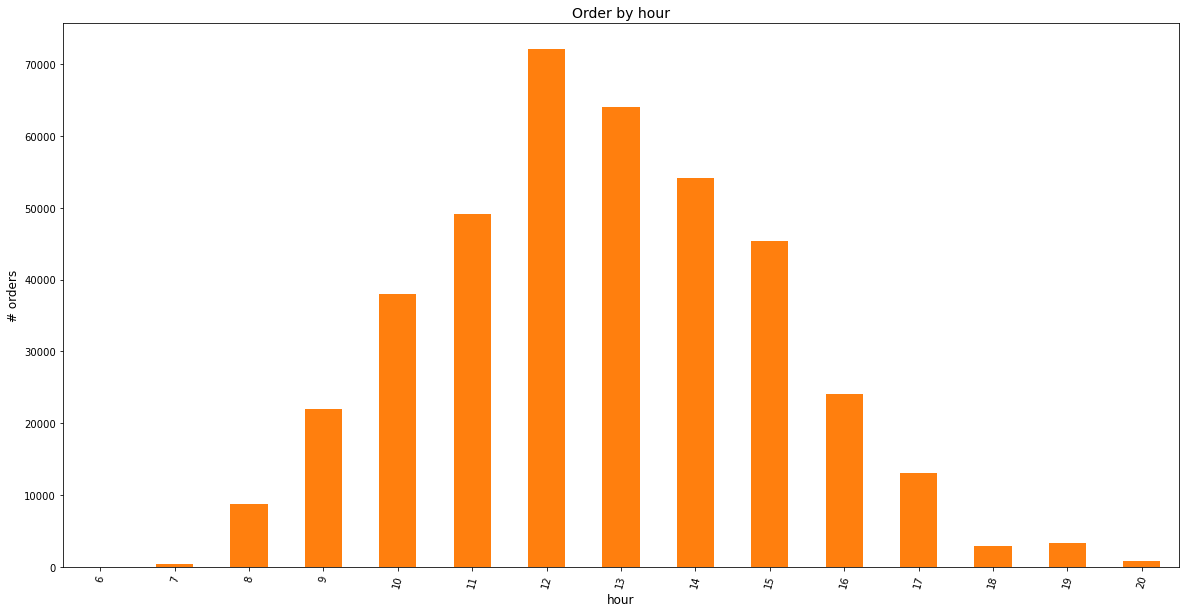

In [78]:
plot_bar(order_by_hour, 'hour', '# orders', 'Order by hour')

In [79]:
def half_an_hour(date):
    minute = ':00'
    if date.minute > 30:
        minute = ':30'
    hour = str(date.hour)
    if date.hour < 10:
        hour = '0' + hour
        
    return hour + minute

In [80]:
order_by_hour_half = df.set_index('InvoiceDate').groupby(half_an_hour).count()['CustomerID']
order_by_hour_half

06:00        1
07:30      379
08:00     3145
08:30     5545
09:00     9364
09:30    12580
10:00    16950
10:30    21047
11:00    18925
11:30    30159
12:00    37174
12:30    34891
13:00    31131
13:30    32895
14:00    26958
14:30    27160
15:00    24227
15:30    21142
16:00    14316
16:30     9773
17:00     8889
17:30     4182
18:00     1715
18:30     1213
19:00     1534
19:30     1787
20:00      802
Name: CustomerID, dtype: int64

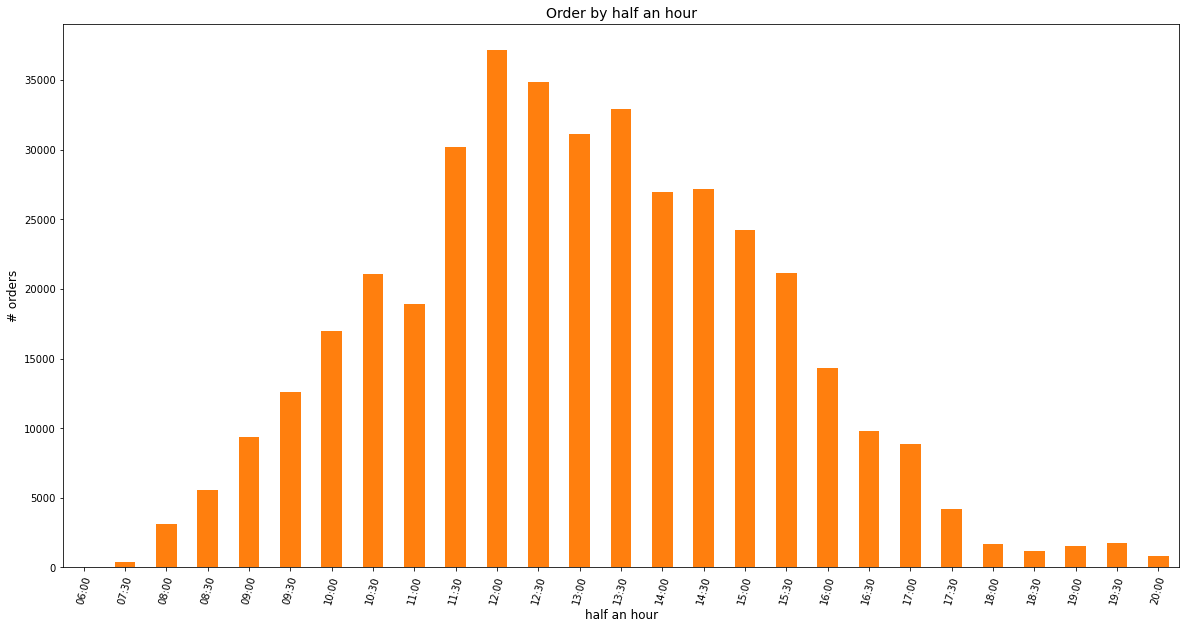

In [81]:
plot_bar(order_by_hour_half, 'half an hour', '# orders', 'Order by half an hour')

In [83]:
# Find percentage
order_by_hour_half / order_by_hour_half.sum()

06:00    0.000003
07:30    0.000953
08:00    0.007904
08:30    0.013936
09:00    0.023534
09:30    0.031617
10:00    0.042600
10:30    0.052897
11:00    0.047564
11:30    0.075798
12:00    0.093429
12:30    0.087691
13:00    0.078241
13:30    0.082675
14:00    0.067753
14:30    0.068261
15:00    0.060890
15:30    0.053136
16:00    0.035980
16:30    0.024562
17:00    0.022341
17:30    0.010511
18:00    0.004310
18:30    0.003049
19:00    0.003855
19:30    0.004491
20:00    0.002016
Name: CustomerID, dtype: float64

### 4.1.1 Personalized Push Notification

In [84]:
# Purchase time & Quantity for each customer
order_count_by_hour = df.set_index('InvoiceDate').groupby(['CustomerID', lambda date: date.hour]).count()['StockCode']
order_count_by_hour

CustomerID    
12346       10     1
12347       8     22
            10    24
            12    47
            13    18
                  ..
18283       15     1
            16    56
            19    87
18287       9      3
            10    67
Name: StockCode, Length: 11205, dtype: int64

In [89]:
# Find out time frame for purhcased amount per customer
idx = order_count_by_hour.groupby('CustomerID').idxmax()
idx

CustomerID
12346    (12346, 10)
12347    (12347, 14)
12348    (12348, 19)
12349     (12349, 9)
12350    (12350, 16)
            ...     
18280     (18280, 9)
18281    (18281, 10)
18282    (18282, 13)
18283    (18283, 14)
18287    (18287, 10)
Name: StockCode, Length: 4338, dtype: object

In [90]:
result = order_count_by_hour.loc[idx]
result

CustomerID    
12346       10      1
12347       14     60
12348       19     17
12349       9      73
12350       16     17
                 ... 
18280       9      10
18281       10      7
18282       13      7
18283       14    201
18287       10     67
Name: StockCode, Length: 4338, dtype: int64

In [95]:
# group customers based on hour
result_hour = result.reset_index().groupby('level_1').groups
# 7am
result_hour[7]

Int64Index([73, 269, 319, 344, 375, 893, 1667, 2317], dtype='int64')